- Notebook to process the car driving Turing test results

In [1]:
# imports
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the csv file and parse into classes
myFile = pd.read_csv('example.csv',sep=',')
data = myFile.values

In [3]:
# ground truth: 1 is real, 2 is fake
groundtruth = np.array([2,1,1,1,2,2,2,2,1,1])
#print(groundtruth)

In [27]:
# Go over the responses and capture true negatives, true positive, false negative and false positives
nrows = data.shape[0]
ncols = data.shape[1]

tp =0;tn=0;fp=0;fn=0
for rownum in range(nrows):
    #print('rownum = ',rownum)
    for colnum in range(ncols):
        #print('colnum = ',colnum)
        truth = groundtruth[colnum]
        #print('truth = ',truth)
        pred = data[rownum][colnum]
        #print('pred = ',pred)
        if pred == truth:
            #print("Either tn or tp")
            if truth == 1: # Ground truth is real driving
                tp = tp+1
            else:          # Ground truth is fake driving
                tn = tn+1
        else:
            if truth == 1: # Ground truth is real
                fn = fn+1
            else:
                fp = fp+1


In [28]:
cnf_matrix = np.array([[tp,fp],[fn,tn]])
print(cnf_matrix)

[[40 30]
 [20 30]]


Text(0.5,257.44,'Predicted driving')

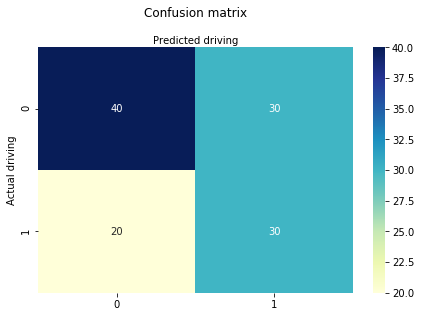

In [29]:
# Create the Confusion Matrix

# Visualizing the Confusion Matrix
class_names = [1,2] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(1,3) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual driving')
plt.xlabel('Predicted driving')